Predict Consumer Electronics Sales Dataset

In [ ]:
# importing libraries for data processing and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# importing libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# full display of columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving consumer_electronics_sales_data.csv to consumer_electronics_sales_data.csv


In [ ]:
df = pd.read_csv("consumer_electronics_sales_data.csv")
df.head()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,5875,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,5876,Tablets,Samsung,2606.718293,63,0,1,5,1
3,5877,Smartphones,Samsung,870.395450,63,1,10,3,1
4,5878,Tablets,Sony,1798.955875,57,0,17,3,0


In [ ]:
df.tail()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
8995,14869,Smart Watches,Samsung,1041.149163,36,1,16,4,0
8996,14870,Smartphones,Samsung,1485.694311,57,0,5,1,1
8997,14871,Headphones,Samsung,2887.369597,28,0,18,4,0
8998,14872,Tablets,HP,1490.453964,38,0,4,2,1
8999,14873,Smartphones,Sony,2315.583087,62,0,15,2,1


EDA - EXPLORATORY DATA ANALYSIS




UNIVARIATE ANALYSIS

SHAPE OF THE DATASET

In [ ]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 9000 rows and 9 columns.


INFORMATION ON TYEH DATASET

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductID             9000 non-null   int64  
 1   ProductCategory       9000 non-null   object 
 2   ProductBrand          9000 non-null   object 
 3   ProductPrice          9000 non-null   float64
 4   CustomerAge           9000 non-null   int64  
 5   CustomerGender        9000 non-null   int64  
 6   PurchaseFrequency     9000 non-null   int64  
 7   CustomerSatisfaction  9000 non-null   int64  
 8   PurchaseIntent        9000 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 632.9+ KB


DESCRIPTIVE ANALYSIS

In [ ]:
df.describe()

,ProductID,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,10373.500000,1527.429195,43.347000,0.508889,10.054667,2.996000,0.566444
std,2598.220545,829.900898,15.055084,0.499949,5.461328,1.405301,0.495593
min,5874.000000,100.376358,18.000000,0.000000,1.000000,1.000000,0.000000
25%,8123.750000,809.165014,30.000000,0.000000,5.000000,2.000000,0.000000
50%,10373.500000,1513.024577,43.000000,1.000000,10.000000,3.000000,1.000000
75%,12623.250000,2244.415520,56.000000,1.000000,15.000000,4.000000,1.000000
max,14873.000000,2999.852253,69.000000,1.000000,19.000000,5.000000,1.000000


* `Product Price:`
  * Minimum: 100.38
  * Maximum: 2999.85
  * Average: 1527.43
  
* `Customer Age:`
  * Minimum: 18
  * Maximum: 69
  * Average: 43.35
  
* `Purchase Frequency:`
  * Minimum: 1
  * Maximum: 19
  * Average: 10.1
  
* `Customer Satisfaction:`
  * Minimum: 1
  * Maximum: 5
  * Average: 2.99

MISSING VALUES

In [ ]:
df.isnull().sum()

ProductID               0
ProductCategory         0
ProductBrand            0
ProductPrice            0
CustomerAge             0
CustomerGender          0
PurchaseFrequency       0
CustomerSatisfaction    0
PurchaseIntent          0
dtype: int64

DUPLICATES

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['ProductID', 'ProductCategory', 'ProductBrand', 'ProductPrice', 'CustomerAge', 'CustomerGender', 'PurchaseFrequency', 'CustomerSatisfaction', 'PurchaseIntent'], dtype='object')

VISUALIZATION



PRODUCT CATEGORY

In [ ]:
custom_colors = ['#E3C5F9']
plt = px.histogram(df, x='ProductCategory', title="Product Category Distribution", color_discrete_sequence=custom_colors)
plt.show()

* We've 5 Product Categories:
  * 1. Smart Phones
  * 2. Smart Watches
  * 3. Taplets
  * 4. Laptops
  * 5. Headphones

In [ ]:
custom_colors = ['#E3C5F9']
plt = px.histogram(df, x = 'ProductBrand', title="Product Brand Distribution",  color_discrete_sequence=custom_colors)
plt.show()

BRAND

In [ ]:
plt = px.histogram(df, x = 'ProductBrand', title="Product Brand Distribution",  color_discrete_sequence=px.colors.sequential.Aggrnyl)
plt.show()

* We've 4 Brands and 1 is Other Brands:
  * 1. Samsung
  * 2. Sony
  * 3. HP
  * 4. Apple

PRICE PREDICTION

In [ ]:
plt = px.histogram(df, x = 'ProductPrice', title="Product Price Distribution", color_discrete_sequence=px.colors.sequential.Agsunset)
plt.show()

Product Price Range: 100.38 - 2999.85
* Products are in Expensive Range.

AGE DISTRIBUTION

In [ ]:
plt = px.histogram(df, x = 'CustomerAge', title="Customer Age Distribution", color_discrete_sequence=px.colors.sequential.Bluered)
plt.show()

* Age range is 18 - 69

GENDER DISTRIBUTION

In [ ]:
plt = px.pie(df, names = 'CustomerGender', title="Customer Gender Distribution", color_discrete_sequence=px.colors.sequential.Turbo_r)
plt.show()

* 0 - Male (49.1%)
* 1 - Female (50.9%)

PURCHASE FREQUENCY DISTRIBUTION

In [ ]:
plt = px.histogram(df, x = 'PurchaseFrequency', title="Purchase Frequency Distribution", color_discrete_sequence=px.colors.sequential.haline)
plt.show()

The Range is 1 - 19

CUSTOMER SATISFACTION DISTRIBUTION

In [ ]:
plt = px.histogram(df, x = 'CustomerSatisfaction', title="Customer Satisfaction Distribution", color_discrete_sequence=px.colors.sequential.Viridis)
plt.show()

* Range is 1 - 5 and average is 3

PURCHASE INTENT (TARGET VARIABLE) DISTRIBUTION

In [ ]:
plt = px.pie(df, names = 'PurchaseIntent', title="Purchase Intent Distribution", color_discrete_sequence=px.colors.sequential.Mint)
plt.show()

We've `0 and 1` which means `Not Purchase` and `Purchase`.

A binary classification problem.

`0: Not Purchase --> 43.4%`

`1: Purchase --> 56.6%`

MULTI VARIATE ANALYSIS

PLOTING EACH VARIABLE VS TARGET VARIABLE

In [ ]:
for col in df.columns:
    plt = px.histogram(df, x=col, color='PurchaseIntent', title=f"{col} Distribution", color_discrete_sequence=px.colors.sequential.Blackbody_r)
    plt.show()

#### Based on the above ploting of columns against Target Variable

Mosly People From Age 18 to 30 don't purchase maybe due to high price.

Females are the most buyers.

Customer Satisfaction with 4 and 5 are mostly tends to buy.



PRODUCTS VS BRANDS

Let's Check Products by Brands to see the distribution.

In [ ]:
plt = px.histogram(df, x = 'ProductCategory', color='ProductBrand', title="Product Category and Brand Distribution", color_discrete_sequence=px.colors.sequential.Blackbody)
plt.show()

* All products are from all the brands present in the dataset.

PRODUCT VS PRICE

Products vs Price is to check the distribution of price.

In [ ]:
plt = px.histogram(df, x = 'ProductPrice', color='ProductCategory', title="Product Category and Price Distribution", color_discrete_sequence=px.colors.sequential.Blackbody)
plt.show()

All Products lies in the same price range.

BRAND VS PRICE

In [ ]:
plt = px.histogram(df, x = 'ProductPrice', color='ProductBrand', title="Product Category and Price Distribution", color_discrete_sequence=px.colors.sequential.Blackbody)
plt.show()

All brands offer the almost same price range.

AGE VS PRDUCT CATEGORY AND PRICE

Let's check Age vs Product Category and Price to see what age group buys which product and at which price.

In [ ]:
plt = px.histogram(df, x= 'CustomerAge', y = 'ProductPrice', color= 'ProductCategory',title="Customer Age and Product Category Distribution",color_discrete_sequence=px.colors.sequential.Blackbody)
plt.show()

Based on the above figure, customers from all age groups buy all the products available in this dataset, which means that age does not matter.

HEATMAP CORRELATION MATRIX

Some of the features are categorical and some are numerical. So, we need to encode them.

ENCODING CATEGORICAL DATA

In [ ]:
df.head()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,5875,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,5876,Tablets,Samsung,2606.718293,63,0,1,5,1
3,5877,Smartphones,Samsung,870.395450,63,1,10,3,1
4,5878,Tablets,Sony,1798.955875,57,0,17,3,0


In [ ]:
le = LabelEncoder()
df['ProductCategory'] = le.fit_transform(df['ProductCategory'])
df['ProductBrand'] = le.fit_transform(df['ProductBrand'])

In [ ]:
df.head()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,3,2,312.949668,18,0,2,1,0
1,5875,2,3,980.389404,35,1,7,2,1
2,5876,4,3,2606.718293,63,0,1,5,1
3,5877,3,3,870.395450,63,1,10,3,1
4,5878,4,4,1798.955875,57,0,17,3,0


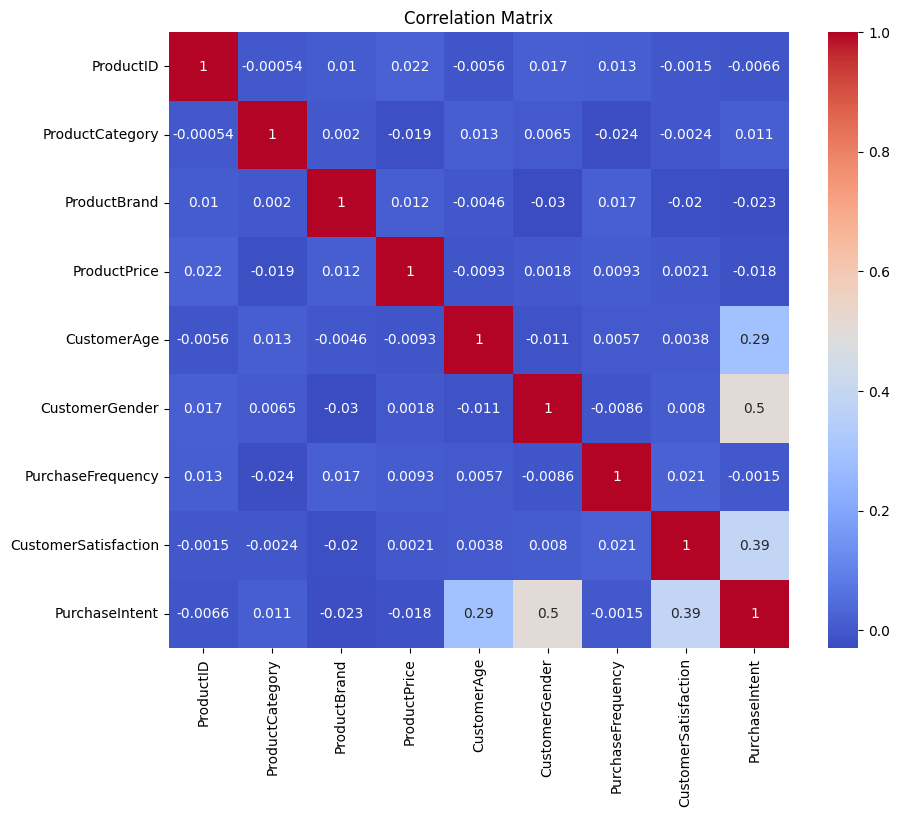

In [ ]:
import matplotlib.pyplot as plt
# correlation matrix and heatmap
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Correlation is a statistical measure that indicates the strength and direction of the linear relationship between two variables. The correlation coefficient ranges from -1 to 1, with the following interpretations:

    -1: Perfect negative correlation (as one variable increases, the other decreases)
    0: No correlation (the variables are independent)
    1: Perfect positive correlation (as one variable increases, the other increases)

MACHINE LEARNING  MODELS

SPLIT DATASET INT TARGET AND FEATURE VARIABLE

In [ ]:
X = df.drop(['ProductID', 'PurchaseIntent'], axis=1)
y = df['PurchaseIntent']

SPLIT DATA INTO TRAINING AND TESTING DATA

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

SCALING THE DATA

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


MODEL BUILDING

`Models` = a set of classification models that you are testing on your dataset, including Linear Regression, Random Forest Classifier, Decision Tree Classifier, Gradient Boosting Classifier, CatBoost Classifier, and XGBoost.

These models are commonly used for binary classification tasks, where the target variable can take values of 0 or 1 (representing purchase intent).

`MSE` is a measure of the average squared difference between the predicted values and the actual values. A lower MSE indicates better model performance.

`R2 R-Squared` value shows how well the model predicts the outcome of the dependent variable. R-Squared values range from 0 to 1. An R-Squared value of 0 means that the model explains or predicts 0% of the relationship between the dependent and independent variables.

In [ ]:
# Models

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),

    'XGBoost': XGBClassifier(random_state=42)
}

# Training the model

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")

print("--------------------------------------------------------------------")

# Evaluate the models
model_scores = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_scores[name] = {
        'MSE': mse,
        'R2': r2
    }
    print(f"{name} MSE: {mse:.2f}, R2: {r2:.2f}")

# Find the best model
best_model_name = max(model_scores, key=lambda x: model_scores[x]['R2'])
best_model_score = model_scores[best_model_name]['R2']
print(f"Best model: {best_model_name} with R2: {best_model_score:.2f}")

Linear Regression trained.
Random Forest trained.
Decision Tree trained.
Gradient Boosting trained.
XGBoost trained.
--------------------------------------------------------------------
Linear Regression MSE: 0.13, R2: 0.48
Random Forest MSE: 0.05, R2: 0.81
Decision Tree MSE: 0.10, R2: 0.60
Gradient Boosting MSE: 0.05, R2: 0.81
XGBoost MSE: 0.05, R2: 0.80
Best model: Random Forest with R2: 0.81


RESULTS


1. Random Forest MSE: 0.05, R2: 0.81

2. Gradient Boosting MSE: 0.05, R2: 0.81

3. CatBoost Classifier MSE: 0.05, R2: 0.81


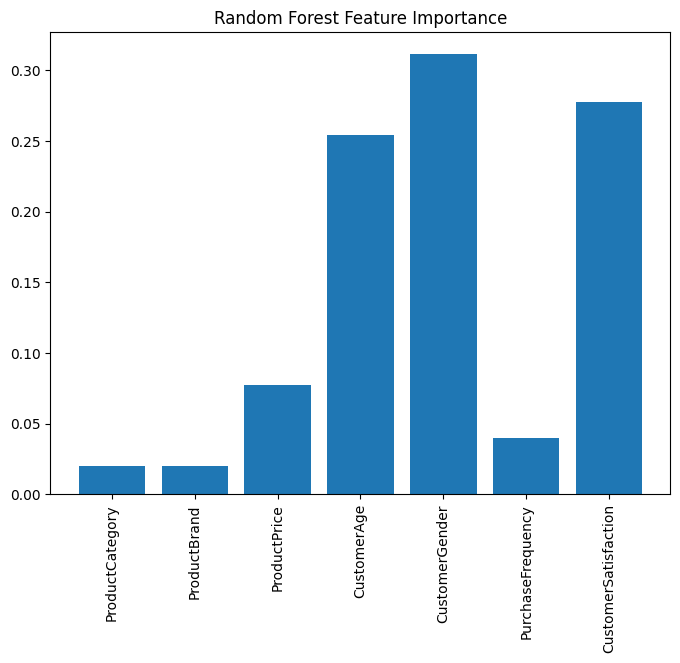

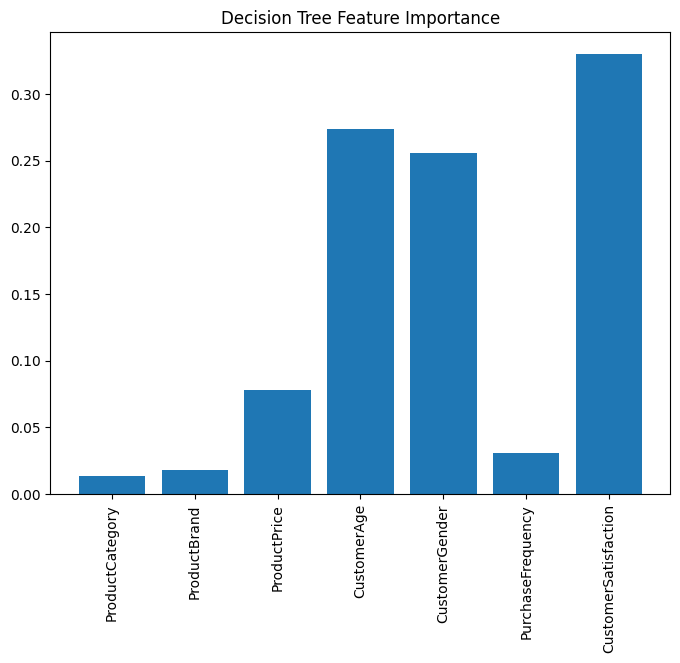

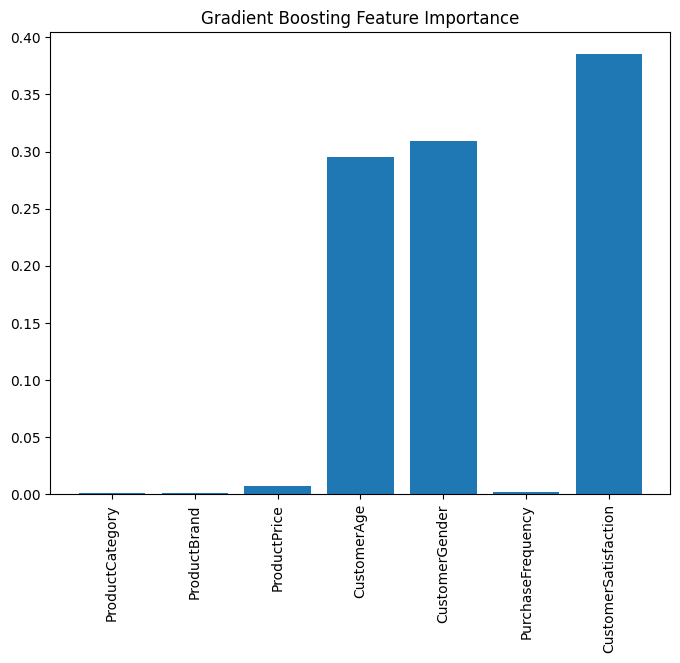

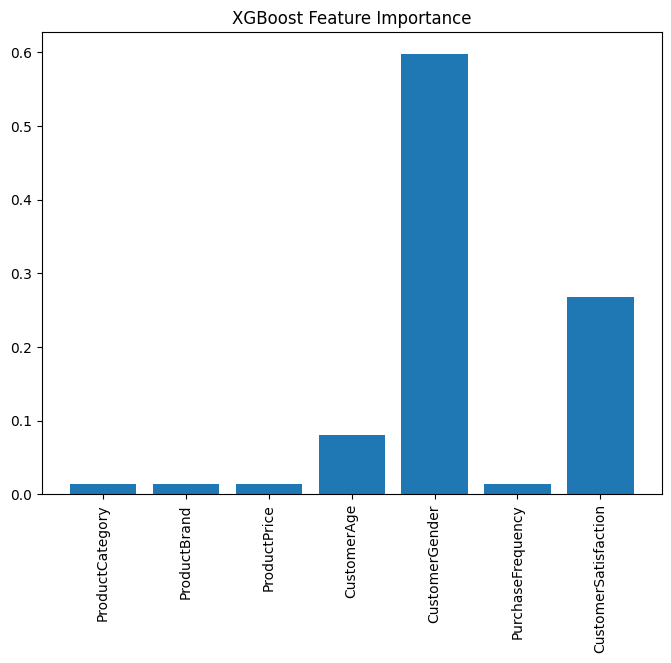

In [ ]:
import matplotlib.pyplot as plt

for name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        plt.figure(figsize=(8, 6))
        plt.bar(range(len(feature_importances)), feature_importances)
        plt.xticks(range(len(feature_importances)), X.columns, rotation=90)
        plt.title(f"{name} Feature Importance")
        plt.show()

WITH PARAMETER

In [ ]:
# Models

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(learning_rate=0.05, n_estimators=50, random_state=42),

    'XGBoost': XGBClassifier(n_estimators=100, random_state=42)
}

# Training the model

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")

print("--------------------------------------------------------------------")

# Evaluate the models
model_scores = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_scores[name] = {
        'MSE': mse,
        'R2': r2
    }
    print(f"{name} MSE: {mse:.2f}, R2: {r2:.2f}")

# Find the best model
best_model_name = max(model_scores, key=lambda x: model_scores[x]['R2'])
best_model_score = model_scores[best_model_name]['R2']
print(f"Best model: {best_model_name} with R2: {best_model_score:.2f}")


Linear Regression trained.
Random Forest trained.
Decision Tree trained.
Gradient Boosting trained.
XGBoost trained.
--------------------------------------------------------------------
Linear Regression MSE: 0.13, R2: 0.48
Random Forest MSE: 0.05, R2: 0.81
Decision Tree MSE: 0.10, R2: 0.60
Gradient Boosting MSE: 0.05, R2: 0.81
XGBoost MSE: 0.05, R2: 0.80
Best model: Random Forest with R2: 0.81


NO EFFECT ON PARAMETERS

MACHINE  LEARNING ADVANCED

FEATURE ENGINEERING

I'll do the feature engineering in to check if it increase the model performing score.



In [ ]:
df.head()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,3,2,312.949668,18,0,2,1,0
1,5875,2,3,980.389404,35,1,7,2,1
2,5876,4,3,2606.718293,63,0,1,5,1
3,5877,3,3,870.395450,63,1,10,3,1
4,5878,4,4,1798.955875,57,0,17,3,0


PRODUCT PRICE BINDING

In [ ]:
df['ProductPriceBucket'] = pd.cut(df['ProductPrice'], bins=[100, 500, 1000, 1500, 2000, 3000], labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

In [ ]:
plt = px.histogram(df, x = 'ProductPriceBucket', title="Product Price Distribution", color_discrete_sequence=px.colors.sequential.ice)
plt.show()

AGE BINNING

In [ ]:
df['CustomerAgeGroup'] = pd.qcut(df['CustomerAge'], q=4, labels=['Young', 'Middle-aged', 'Mature', 'Senior'])

In [ ]:
plt = px.histogram(df, x = 'CustomerAgeGroup', title="Customer Age Distribution", color_discrete_sequence=px.colors.sequential.Blackbody)
plt.show()

PURCHASE PRICE BINNING

In [ ]:
df['PurchaseFrequencyGroup'] = pd.qcut(df['PurchaseFrequency'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

In [ ]:
plt = px.histogram(df, x = 'PurchaseFrequencyGroup', title="Purchase Frequency Distribution", color_discrete_sequence=px.colors.sequential.thermal)
plt.show()

CUSTOMER SATISFACTION BINNING

In [ ]:
df['CustomerSatisfactionGroup'] = pd.qcut(df['CustomerSatisfaction'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

In [ ]:
plt = px.histogram(df, x = 'CustomerSatisfactionGroup', title="Customer Satisfaction Distribution", color_discrete_sequence=px.colors.sequential.Sunset)
plt.show()


CUSTOMER SATISFACTION WITH PURCHASE FREQUENCY

I explore the relationship between customer satisfaction and purchase frequency by creating an interaction feature. This new feature, CustomerSatisfaction_PurchaseFrequency, captures the combined effect of a customer's satisfaction level and their purchase frequency.

The rationale behind this feature is to see if there is a significant relationship between these two variables. For instance, customers with high satisfaction levels might tend to purchase more frequently, while those with low satisfaction might purchase less frequently. By multiplying CustomerSatisfaction and PurchaseFrequency, I can gain insights into these patterns.

In [ ]:
df['CustomerSatisfaction_PurchaseFrequency'] = df['CustomerSatisfaction'] * df['PurchaseFrequency']


In [ ]:
plt = px.histogram(df, x = 'CustomerSatisfaction_PurchaseFrequency', title="Customer Satisfaction and Purchase Frequency Distribution", color_discrete_sequence=px.colors.sequential.Sunsetdark)
plt.show()

LABEL ENCODING

In [ ]:
le = LabelEncoder()
df['ProductPriceBucket'] = le.fit_transform(df['ProductPriceBucket'])
df['CustomerAgeGroup'] = le.fit_transform(df['CustomerAgeGroup'])
df['PurchaseFrequencyGroup'] = le.fit_transform(df['PurchaseFrequencyGroup'])
df['CustomerSatisfactionGroup'] = le.fit_transform(df['CustomerSatisfactionGroup'])

In [ ]:
df.head()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent,ProductPriceBucket,CustomerAgeGroup,PurchaseFrequencyGroup,CustomerSatisfactionGroup,CustomerSatisfaction_PurchaseFrequency
0,5874,3,2,312.949668,18,0,2,1,0,4,3,1,1,2
1,5875,2,3,980.389404,35,1,7,2,1,1,1,2,1,14
2,5876,4,3,2606.718293,63,0,1,5,1,3,2,1,3,5
3,5877,3,3,870.395450,63,1,10,3,1,1,2,2,2,30
4,5878,4,4,1798.955875,57,0,17,3,0,0,2,3,2,51


MACHINE LEARNING

In [ ]:
# Feature and Target
X = df.drop(['ProductID', 'PurchaseIntent'], axis=1)
y = df['PurchaseIntent']

# Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# Models

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(learning_rate=0.05, n_estimators=50, random_state=42),

    'XGBoost': XGBClassifier(n_estimators=100, random_state=42)
}

# Training the model

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")

print("--------------------------------------------------------------------")

# Evaluate the models
model_scores = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_scores[name] = {
        'MSE': mse,
        'R2': r2
    }
    print(f"{name} MSE: {mse:.2f}, R2: {r2:.2f}")

# Find the best model
best_model_name = max(model_scores, key=lambda x: model_scores[x]['R2'])
best_model_score = model_scores[best_model_name]['R2']
print(f"Best model: {best_model_name} with R2: {best_model_score:.2f}")



Linear Regression trained.
Random Forest trained.
Decision Tree trained.
Gradient Boosting trained.
XGBoost trained.
--------------------------------------------------------------------
Linear Regression MSE: 0.11, R2: 0.56
Random Forest MSE: 0.05, R2: 0.81
Decision Tree MSE: 0.10, R2: 0.59
Gradient Boosting MSE: 0.05, R2: 0.81
XGBoost MSE: 0.05, R2: 0.80
Best model: Random Forest with R2: 0.81


RESULTS
`TOP BEST MODELS`
1. Random Forest MSE: 0.05, R2: 0.81
2. Gradient Boosting MSE: 0.05, R2: 0.81
3. CatBoost Classifier MSE: 0.05, R2: 0.81

XGBoost MSE: 0.05, R2: 0.80

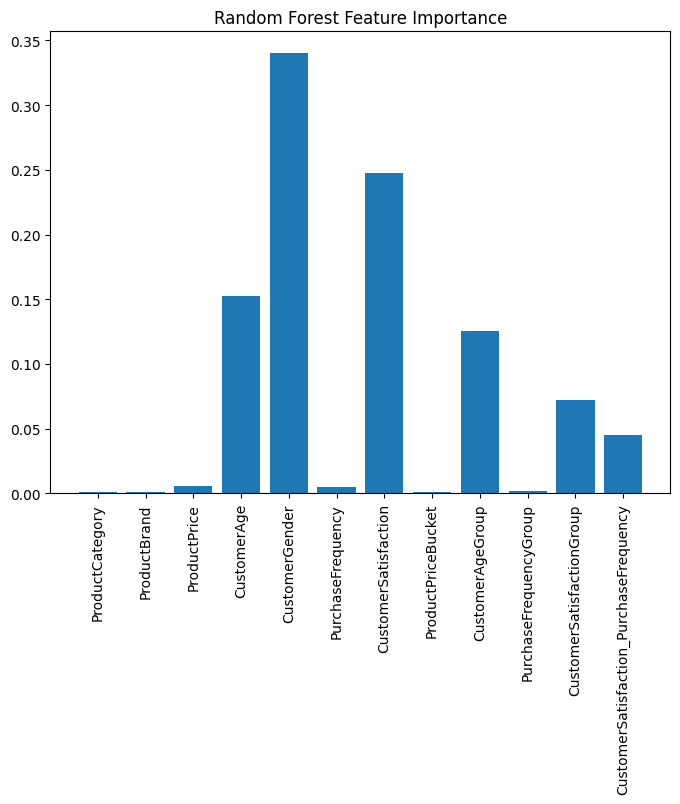

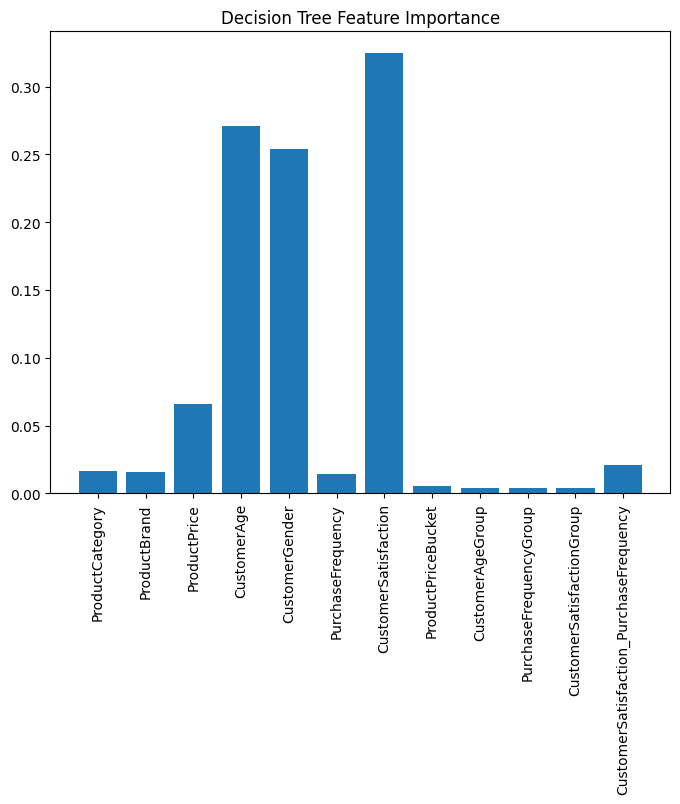

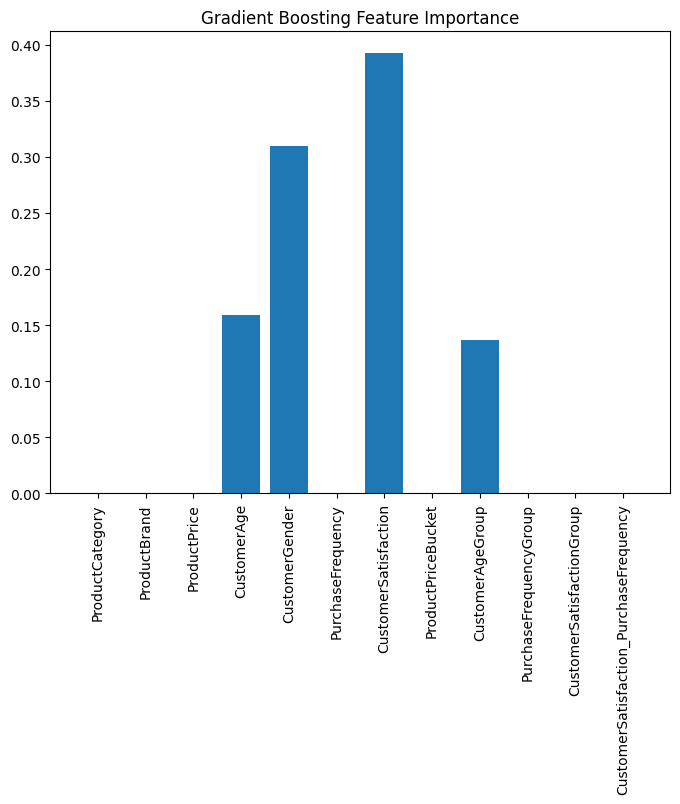

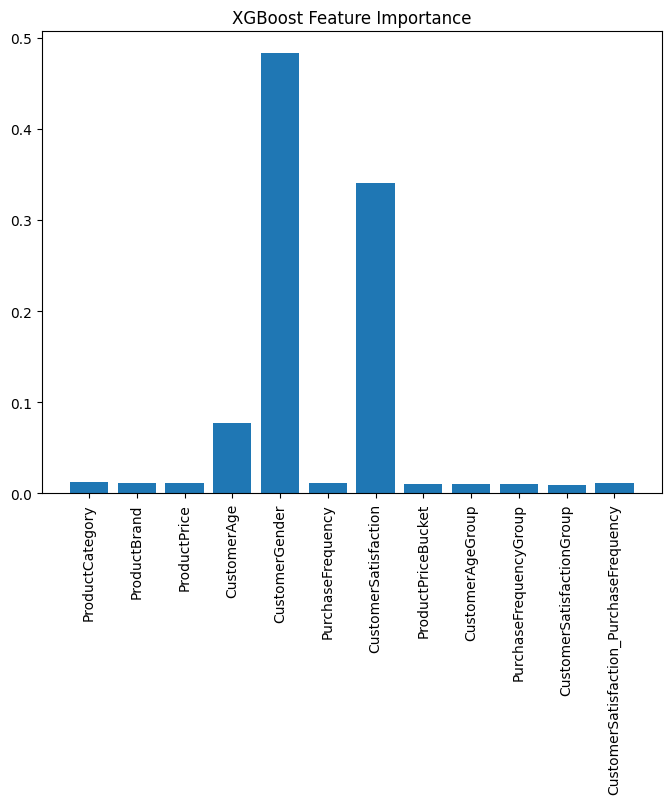

In [ ]:
import matplotlib.pyplot as plt

for name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        plt.figure(figsize=(8, 6))
        plt.bar(range(len(feature_importances)), feature_importances)
        plt.xticks(range(len(feature_importances)), X.columns, rotation=90)
        plt.title(f"{name} Feature Importance")
        plt.show()

SAVE THE BEST MODEL (PICKLE)

In [ ]:
import pickle

In [ ]:
# Save the best model
best_model = models[best_model_name]
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [ ]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f).